<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [21]:
import tensorflow as tf

## Creating new data to view it

In [22]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

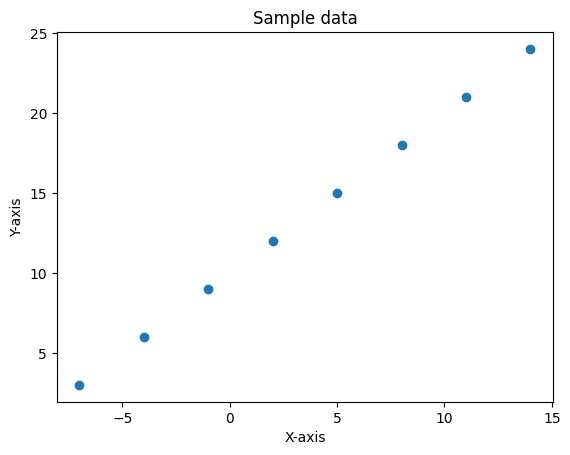

In [23]:
plt.scatter(X,y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample data")
plt.show()

In [24]:
y == X + 10 # from this we can tell that the equation of the line would be y = X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [25]:
# our input and output shapes are going to be 1
X[0].shape, y[0].shape # its showing nothing cause when we are accesing 1 value from an array it returns a scalar.

((), ())

In [26]:
X[0].ndim # this shows that it is a scalar

0

In [27]:
# turning the numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in creating a model in tensorflow
1. **Creating the model** - defining the input, output layers and alos the hidden layers.
2. **Compiling the model** - defining the loss function that will correct out model, choosing the optimzer that tells our model how to improve the patterns it is learning and evaluation metrics thats tells us the performance of our model.
3. **Fitting the model** - Letting the model find patterns in X and y which are our features and labels.

In [28]:
X.ndim, tf.expand_dims(X, axis=-1).ndim

(1, 2)

In [29]:
x_new = tf.expand_dims(X, axis=-1)
x_new[1,0]

<tf.Tensor: shape=(), dtype=float64, numpy=-4.0>

In [30]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model.fit(X,y,epochs=5) # since i have provided the input size i do not need to change the tensor to 2 dimensions

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - loss: 17.8164 - mae: 17.8164
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 17.5352 - mae: 17.5352
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 17.2539 - mae: 17.2539
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 16.9727 - mae: 16.9727
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 16.6914 - mae: 16.6914


In [31]:
# predicting using a sample value
chumma = tf.constant([[17.0]]) # make sure the input is always a tensor
model.predict(chumma) # this is when the epochs is 5, has a MAE of 7.4738

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[-11.90551]], dtype=float32)

# Improving the Model
Places to improve the model -
1. **Creating a model**- in this step in order to improve our model we may increase the **number of hidden layers**, we may **increase the number of neurons per layer** or change our **activation function** (in this case its linear by default).
2.**Compiling the model** - here we might the change the optmization function or the **learning rate**.
3. **Fitting a model** - here we might increase the number of **epochs** or give the model more **data**.

## Improving the model only by increasing the epoch number

In [32]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model_epoch = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_epoch.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model_epoch.fit(tf.expand_dims(X, axis=-1),y,epochs=100) # Since i have not provided the input shape,
# i will have to convert my 1 dimensional tensor to 2 dimensions

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - loss: 7.5566 - mae: 7.5566
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.4812 - mae: 7.4812
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.4756 - mae: 7.4756
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.4700 - mae: 7.4700
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.4644 - mae: 7.4644
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.4587 - mae: 7.4587
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.4531 - mae: 7.4531
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.4475 - mae: 7.4475
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.4419 - mae: 7.4419
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.4363 - mae: 7.4363
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/s

In [33]:
chumma = tf.constant([[17.0]])
model_epoch.predict(chumma) # this is when the epochs was 100, has a MAE of 6.8306

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[30.215534]], dtype=float32)

## Improving with another hidden layer

In [34]:
model_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_layer.compile(loss = tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=["mae"])

model_layer.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - loss: 14.0170 - mae: 14.0170
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.3773 - mae: 13.3773
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.7397 - mae: 12.7397
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.1034 - mae: 12.1034
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.4616 - mae: 11.4616
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.8094 - mae: 10.8094
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.1339 - mae: 10.1339
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.4296 - mae: 9.4296
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.6924 - mae: 8.6924
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.9156 - mae: 7.9156
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.0961 - mae: 7.0961
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6.2240 - mae: 6.2240
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [35]:
model_layer.predict(tf.constant([17.0])) # we can see how much our MAE has improved from when we had only 1 layer.
# Even though the MAE is better, the prediction is worse than the previous one.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[31.314543]], dtype=float32)

So, what might be happening in the above case where the training metric has improved but the prediction has worsened is that by increasing the number of layers or increasing the neurons per layer we are over fitting the data and that may cause the prediction value to be worse than before.

Note - The learning rate is the most important hyperparameter that we can change to improve our model.

# Evaluating models

In [36]:
X = np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [37]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Visualizing the data

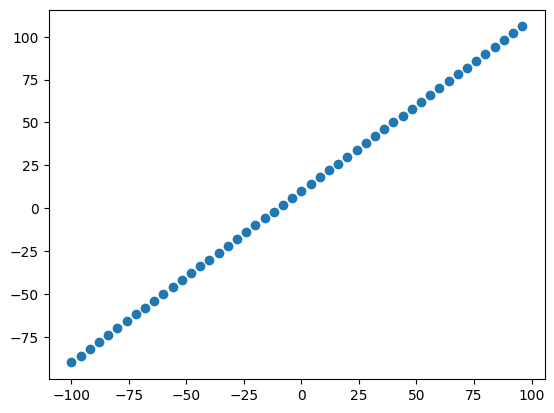

In [38]:
plt.scatter(X,y)

In [39]:
# Splitting the dataset
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

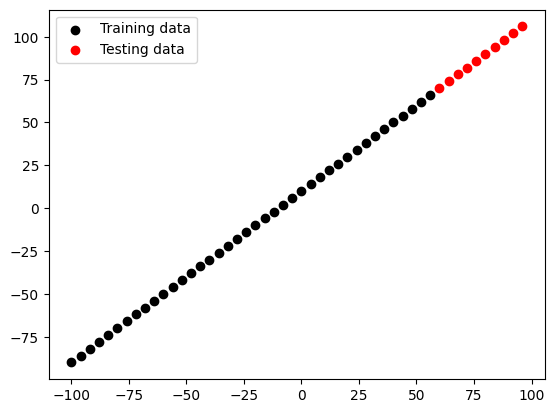

In [40]:
### Vizualizing the training data
plt.scatter(X_train,y_train,c="black",label="Training data")

### Vizualizing the testing data
plt.scatter(X_test,y_test,c="r",label="Testing data")

plt.legend()
plt.show()

In [41]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

## Vizualizing the model

In [42]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** = total number of parameters in the model.
* **Trainable params** = total number of parameters that the model can update as it trains.
* **Non-trainable params** = these are the parameters that the model cant update as these are from an imported model which is already trained. imported models are mostly used during **transfer learning**.

In [43]:
# 3. Fitting the model
model.fit(X_train,y_train,epochs=100,verbose=0)

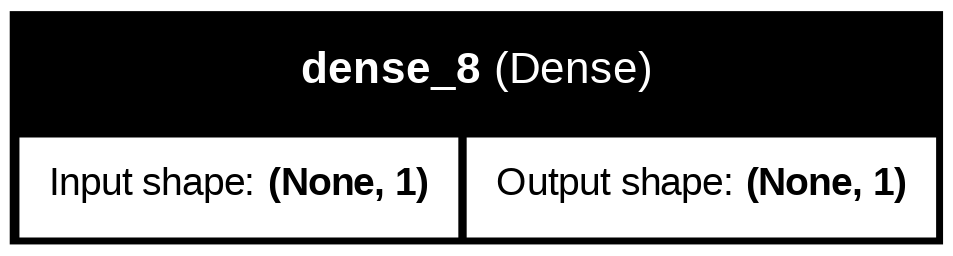

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True,show_layer_names = True)

## Visulaizing the model Predictions

In [45]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[ 63.252502],
       [ 67.375084],
       [ 71.497665],
       [ 75.62025 ],
       [ 79.742836],
       [ 83.86542 ],
       [ 87.988   ],
       [ 92.11059 ],
       [ 96.23317 ],
       [100.35575 ]], dtype=float32)

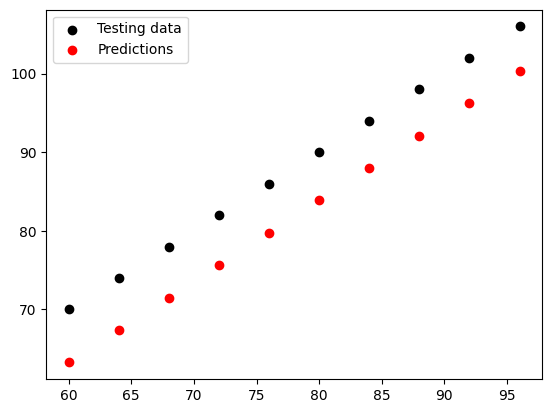

In [46]:
plt.scatter(X_test,y_test,c="black",label="Testing data")
plt.scatter(X_test,y_pred,c="r",label="Predictions")
plt.legend()
plt.show()

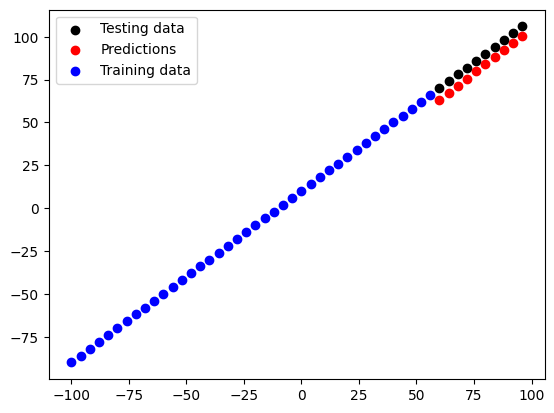

In [47]:
plt.scatter(X_test,y_test,c="black",label="Testing data")
plt.scatter(X_test,y_pred,c="r",label="Predictions")
plt.scatter(X_train,y_train,c="blue",label="Training data")
plt.legend()
plt.show() # shitty ass model

## Evaluations metrics

### MAE

In [48]:
y_test.shape, y_pred.shape

((10,), (10, 1))

In [49]:
mae = tf.keras.losses.MeanAbsoluteError()

In [50]:
mae_value = mae.call(y_test,y_pred)
mae_value

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([6.7474976, 6.624916 , 6.5023346, 6.379753 , 6.257164 , 6.1345825,
       6.012001 , 5.889412 , 5.7668304, 5.644249 ], dtype=float32)>

In [51]:
# changing the shape to get 1 value
y_pred = tf.squeeze(y_pred)

In [52]:
mae_value = mae(y_test,y_pred)
mae_value

<tf.Tensor: shape=(), dtype=float32, numpy=6.195874214172363>

### MSE

In [53]:
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_test,y_pred)
mse_value

<tf.Tensor: shape=(), dtype=float32, numpy=38.51282501220703>

## Running experiments to improve our model

### Simple model with one layer and 100 epochs

In [54]:
X,y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [55]:
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fitting the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 98.6048 - mae: 98.6048
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 63.4366 - mae: 63.4366
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 28.7152 - mae: 28.7152
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.8882 - mae: 9.8882
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.5444 - mae: 11.5444
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.5292 - mae: 8.5292
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.9979 - mae: 9.9979  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.6899 - mae: 11.6899
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.6389 - mae: 8.6389
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.1077 - mae: 10.1077
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.8355 - mae: 11.8355
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.7487 - mae: 8.7487
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [56]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[53.95666 ],
       [57.46219 ],
       [60.967716],
       [64.47324 ],
       [67.978775],
       [71.4843  ],
       [74.98982 ],
       [78.49535 ],
       [82.000885],
       [85.50641 ]], dtype=float32)

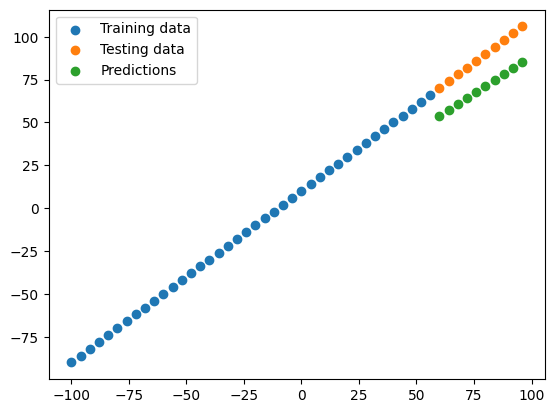

In [57]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.scatter(X_test,y_pred_1,label="Predictions")
plt.legend()
plt.show()

In [58]:
mae_val_1 = mae(y_test,tf.squeeze(y_pred_1))
mae_val_1

<tf.Tensor: shape=(), dtype=float32, numpy=18.268465042114258>

In [59]:
mse_val_1 = mse(y_test,tf.squeeze(y_pred_1))
mse_val_1

<tf.Tensor: shape=(), dtype=float32, numpy=335.75396728515625>

### model with 2 layers and 100 epochs

In [60]:
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
# 3. fitting the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 46.2194 - mae: 46.2194
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 29.4254 - mae: 29.4254 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 26.0139 - mae: 26.0139
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 15.0023 - mae: 15.0023
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 18.9391 - mae: 18.9391
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.6982 - mae: 12.6982
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.0962 - mae: 18.0962
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13.2483 - mae: 13.2483
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 15.3848 - mae: 15.3848
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.2588 - mae: 11.2588
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.1191 - mae: 15.1191
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.1552 - mae: 11.1552
Epoch 13/100
2/2 ━━━━━━

In [61]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[34.04947 ],
       [36.21502 ],
       [38.380573],
       [40.546127],
       [42.711678],
       [44.877228],
       [47.042786],
       [49.208336],
       [51.373886],
       [53.53944 ]], dtype=float32)

In [62]:
mae_val_2 = mae(y_test,tf.squeeze(y_pred_2))
mse_val_2 = mse(y_test,tf.squeeze(y_pred_2))
mae_val_2,mse_val_2

(<tf.Tensor: shape=(), dtype=float32, numpy=44.205543518066406>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1981.8931884765625>)

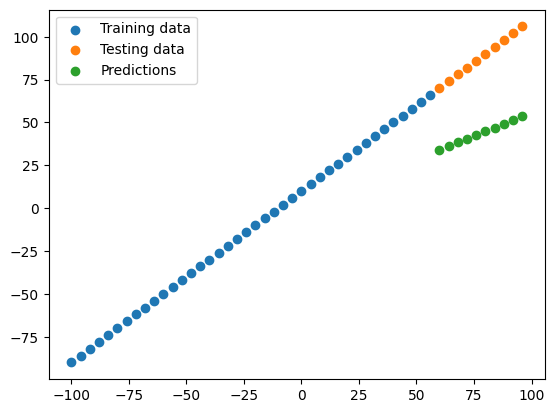

In [63]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.scatter(X_test,y_pred_2,label="Predictions")
plt.legend()
plt.show()

### TW0 layers trained for 500 epochs

In [64]:
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - loss: 48.6768 - mae: 48.6768
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.9222 - mae: 10.9222
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.2141 - mae: 12.2141
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.4906 - mae: 13.4906
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 16.5409 - mae: 16.5409
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.5113 - mae: 9.5113
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.5002 - mae: 10.5002
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.5287 - mae: 11.5287 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.6070 - mae: 12.6070 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.3505 - mae: 14.3505 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.4786 - mae: 11.4786
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.5441 - mae: 12.5441
Epoch 13/500
2/2 ━━━━━━

In [65]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[107.88888],
       [114.51607],
       [121.14327],
       [127.77047],
       [134.39766],
       [141.02484],
       [147.65205],
       [154.27925],
       [160.90645],
       [167.53365]], dtype=float32)

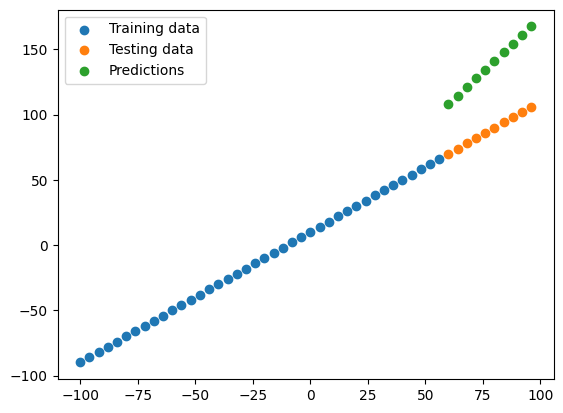

In [66]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.scatter(X_test,y_pred_3,label="Predictions")
plt.legend()
plt.show()

In [67]:
mae_val_3 = mae(y_test,y_pred_3)
mse_val_3 = mse(y_test,y_pred_3)
mae_val_3,mse_val_3

(<tf.Tensor: shape=(), dtype=float32, numpy=49.71125793457031>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2528.152099609375>)

## Comparing the results of our models

In [68]:
import pandas as pd

In [69]:
data = [["model_1",mae_val_1.numpy(),mse_val_1.numpy()],
 ["model_2",mae_val_2.numpy(),mse_val_2.numpy()],["model_3",mae_val_3.numpy(),mse_val_3.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE","MSE"])
df

,Model,MAE,MSE
0,model_1,18.268465,335.753967
1,model_2,44.205544,1981.893188
2,model_3,49.711258,2528.152100


In [70]:
# Looks like model 1 is the best performing model in this scenario
model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Saving out models
* Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

* You can save a TensorFlow/Keras model using model.save().

* There are two ways to save a model in TensorFlow:
    1. The SavedModel format (default).
    2. The HDF5 format.

Usind the HDF5 format stores the data in a universal format

In [71]:
# Using the HDF5 standard
model_3.save("model_3_demo.h5")

## Loading the Model

In [72]:
loaded_model_3 = tf.keras.models.load_model("/content/model_3_demo.h5")
loaded_model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Compare model_1 predictions with loaded model_1 predictions

In [73]:
model_3_preds = model_3.predict(X_test)
loaded_model_3_preds = loaded_model_3.predict(X_test)
model_3_preds == loaded_model_3_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [74]:
model_3_mae = mae(model_3_preds,y_test)
loaded_model_3_mae = mae(loaded_model_3_preds,y_test)
model_3_mae,loaded_model_3_mae

(<tf.Tensor: shape=(), dtype=float32, numpy=49.71125793457031>,
 <tf.Tensor: shape=(), dtype=float32, numpy=49.71125793457031>)

## Larger Model

In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
df_new = pd.get_dummies(df,dtype="int64")
df_new.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [77]:
df_new['charges'].mean()

13270.422265141257

In [78]:
X = df_new.drop("charges",axis=1).values
y = df_new["charges"].values

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [81]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_real = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_real.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
model_real.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 13282.2568 - mae: 13282.2568
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13267.3916 - mae: 13267.3916
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13251.6328 - mae: 13251.6328
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13234.1582 - mae: 13234.1582
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13214.1602 - mae: 13214.1602
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13190.9932 - mae: 13190.9932
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13164.2080 - mae: 13164.2080
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13133.4502 - mae: 13133.4502
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13098.4463 - mae: 13098.4463
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13059.0195 - mae: 13059.0195
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13015.0752 - mae: 13015.0752
Epoch 12/100
34/34 ━━━━━━━━━━

In [82]:
model_real.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

In [83]:
model_real_pred = model_real.predict(X_test)
model_real_mae = mae(y_test,model_real_pred)
model_real_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=7550.94482421875>

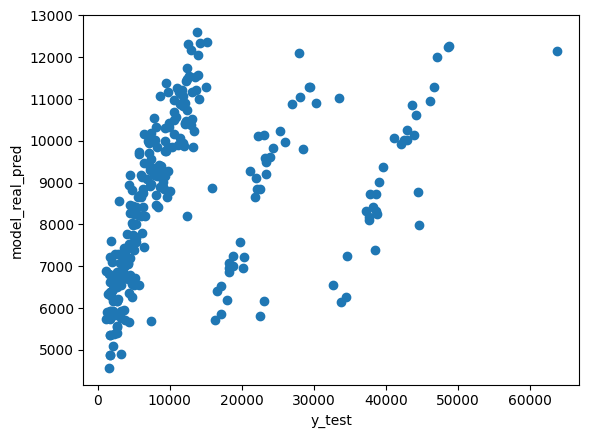

In [84]:
plt.scatter(y_test,model_real_pred)
plt.xlabel("y_test")
plt.ylabel("model_real_pred")
plt.show()

## Improving the model

### Increasing the number of epochs to 500

In [85]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_real_500 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_real_500.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
model_real_500.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 13306.7119 - mae: 13306.7119
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13291.3896 - mae: 13291.3896
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13275.6553 - mae: 13275.6553
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13258.9336 - mae: 13258.9336
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13240.7197 - mae: 13240.7197
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13220.6982 - mae: 13220.6982
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13198.6270 - mae: 13198.6270
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13174.2842 - mae: 13174.2842
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13147.4248 - mae: 13147.4248
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13117.7744 - mae: 13117.7744
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13085.0498 - mae: 13085.0498
Epoch 12/500
34/34 ━━━━━━━━━━

In [86]:
model_real_500_pred = model_real_500.predict(X_test)
model_real_500_mae = mae(y_test,model_real_500_pred)
model_real_500_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=6228.5703125>

In [87]:
data = [["model_real",model_real_mae .numpy()],
 ["model_real_500",model_real_500_mae.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE"])
df

,Model,MAE
0,model_real,7550.944824
1,model_real_500,6228.570312


### 2, 10 NEURON Layers with 500 epochs




In [88]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_real_layer2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_real_layer2.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
model_real_layer2.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 13273.1787 - mae: 13273.1787
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13242.6963 - mae: 13242.6963
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13200.2783 - mae: 13200.2783
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13131.6006 - mae: 13131.6006
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13018.4170 - mae: 13018.4170
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12841.9141 - mae: 12841.9141
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12585.7920 - mae: 12585.7920
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12234.8213 - mae: 12234.8213
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11776.2402 - mae: 11776.2402
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11207.4297 - mae: 11207.4297
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10549.3877 - mae: 10549.3877
Epoch 12/500
34/34 ━━━━━━━━━━

In [89]:
model_real_layer2_pred = model_real_layer2.predict(X_test)
model_real_layer2_mae = mae(y_test,model_real_layer2_pred)
model_real_layer2_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3303.151123046875>

In [90]:
data = [["model_real",model_real_mae .numpy()],
 ["model_real_500",model_real_500_mae.numpy()],["model_real_layer2",model_real_layer2_mae.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE"])
df

,Model,MAE
0,model_real,7550.944824
1,model_real_500,6228.570312
2,model_real_layer2,3303.151123


### Running the same model as above but with a TPU

### 3, 10 NEURON Layers with 500 epochs


In [91]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_real_layer3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_real_layer3.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
model_real_layer3.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 13287.3174 - mae: 13287.3174
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13234.0312 - mae: 13234.0312
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13134.5723 - mae: 13134.5723
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12927.4219 - mae: 12927.4219
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12496.1143 - mae: 12496.1143
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11634.4111 - mae: 11634.4111
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10138.6055 - mae: 10138.6055
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8328.1611 - mae: 8328.1611
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7338.5713 - mae: 7338.5713
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7262.1763 - mae: 7262.1763
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7245.0972 - mae: 7245.0972
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━

In [92]:
model_real_layer3_pred = model_real_layer3.predict(X_test)
model_real_layer3_mae = mae(y_test,model_real_layer3_pred)
model_real_layer3_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3163.9677734375>

In [93]:
data = [["model_real",model_real_mae .numpy()],
 ["model_real_500",model_real_500_mae.numpy()],["model_real_layer2",model_real_layer2_mae.numpy()]
        ,["model_real_layer3",model_real_layer3_mae.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE"])
df

,Model,MAE
0,model_real,7550.944824
1,model_real_500,6228.570312
2,model_real_layer2,3303.151123
3,model_real_layer3,3163.967773


### 3 Layers, 100 neurons and 500 epochs

In [100]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_real_layer_100 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_real_layer_100.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
history = model_real_layer_100.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 13258.1768 - mae: 13258.1768
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13109.9316 - mae: 13109.9316
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12806.9854 - mae: 12806.9854
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12191.8193 - mae: 12191.8193
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11124.5127 - mae: 11124.5127
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9707.1953 - mae: 9707.1953
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8326.3252 - mae: 8326.3252
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7557.3970 - mae: 7557.3970
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7424.3511 - mae: 7424.3511
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7395.2358 - mae: 7395.2358
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7373.6123 - mae: 7373.6123
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [101]:
model_real_layer_100_pred = model_real_layer_100.predict(X_test)
model_real_layer_100_mae = mae(y_test,model_real_layer_100_pred)
model_real_layer_100_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3161.9267578125>

In [102]:
data = [["model_real",model_real_mae .numpy()],
 ["model_real_500",model_real_500_mae.numpy()],["model_real_layer2",model_real_layer2_mae.numpy()]
        ,["model_real_layer3",model_real_layer3_mae.numpy()],["model_real_layer_100",model_real_layer_100_mae.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE"])
df

,Model,MAE
0,model_real,7550.944824
1,model_real_500,6228.570312
2,model_real_layer2,3303.151123
3,model_real_layer3,3163.967773
4,model_real_layer_100,3161.926758


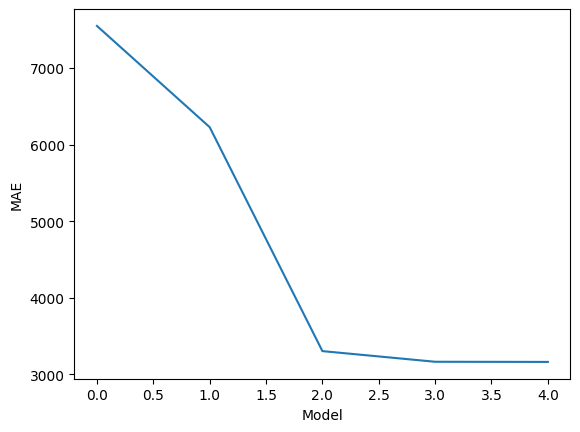

In [103]:
# line plot of mae
plt.plot(df["MAE"])
plt.xlabel("Model")
plt.ylabel("MAE")
plt.show()

Text(0.5, 1.0, 'Loss after epoch')

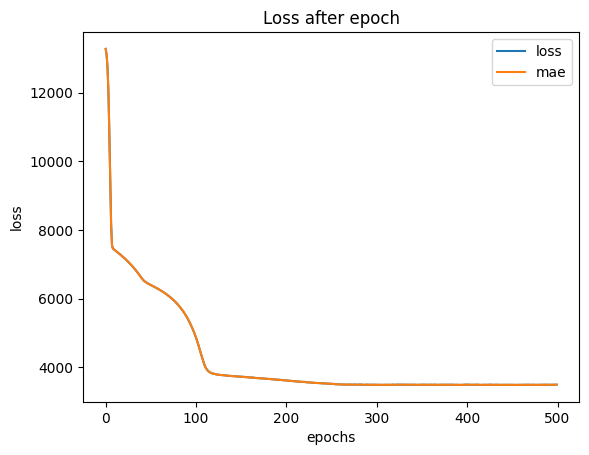

In [105]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")